# Demo of `columnsfmri` 
## Simulation and optimization of fMRI of cortical columns

Import model implementation from columnsfmri.py and other useful modules.

In [1]:
import columnsfmri

%matplotlib inline
import numpy as np
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Inititialize simulation using a 512 x 512 grid on an area of 24 x 24 mm. 

In [2]:
N = 512; L = 24
sim = columnsfmri.simulation(N,L)

Simulate a column pattern by filtering Gaussian white noise. Rho is the main pattern frequency, delta specifies the amount of irregularity.

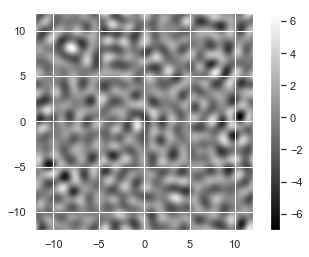

In [3]:
gwn = sim.gwnoise()
rho,deltaRelative = 0.5,0.5
columnPattern = sim.columnPattern(rho,deltaRelative,gwn)
sim.plotPattern(columnPattern)

Simulate a spatial BOLD response with a FWHM of 2 mm, and an average response amplitude of 5%.

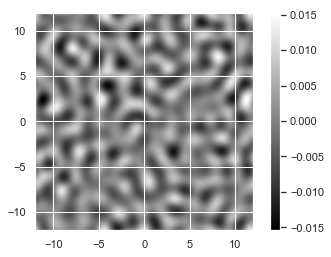

In [4]:
fwhm = 2
beta = 0.05
boldPattern,_,_ = sim.bold(fwhm,beta,columnPattern)
sim.plotPattern(boldPattern)

Simulate MRI sampling using a voxel width of 3 mm. (We first add the relative response pattern to a constant background of 1).

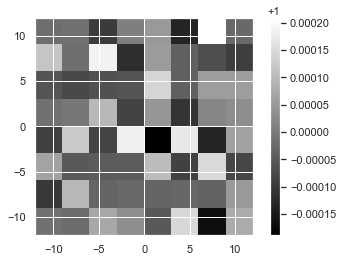

In [5]:
w = 3
mriPattern = sim.mri(w,1+boldPattern)
sim.plotVoxels(mriPattern)

The amount of functional contrast can be quantified as the standard deviation of the imaged responses (contrast range).

In [6]:
c = np.std(mriPattern)
print(str(100*c)+"%")

0.009102633199085303%


Simulate the noise level as a function of voxel width.

In [7]:
w = np.linspace(0.1,3,100)
V = w**3
TR = 2
nT = 100
differentialFlag = True
noiseType = '3T'
SNR = 1/columnsfmri.noiseModel(V,TR,nT,differentialFlag,noiseType=noiseType)

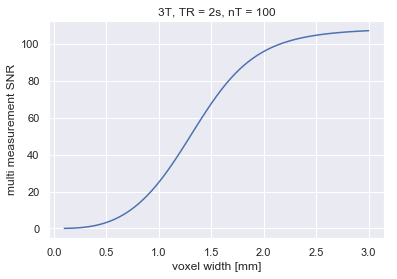

In [8]:
plt.plot(w,SNR)
plt.xlabel('voxel width [mm]')
plt.ylabel('multi measurement SNR')
plt.title('3T, TR = 2s, nT = 100')
plt.show()

Calculate detection probability from CNR and number of voxels.

In [9]:
CNR = 1
nVoxels = 10
columnsfmri.detectionProbability(CNR,nVoxels)

0.5175987740899441

Calculate the correlation between the original and the (interpolated) imaged pattern.

In [10]:
sim.patternCorrelation(columnPattern,mriPattern)

0.0022325362978391707

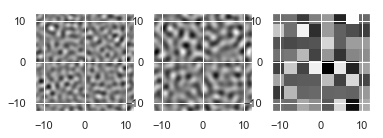

In [11]:
sim.plotColumnsBoldMRI(columnPattern,boldPattern,mriPattern)

In [12]:
from ipywidgets import interactive, interact, interact_manual

N = 512; L = 24
s = columnsfmri.simulation(N,L)
gwn = sim.gwnoise()
rho,deltaRelative = 0.5,0.5
fwhm = 2
beta = 0.05
w = 1

def f(rho,deltaRelative,fwhm,w):
    columnPattern = sim.columnPattern(rho,deltaRelative,gwn)
    boldPattern,_,_ = sim.bold(fwhm,beta,columnPattern)
    mriPattern = sim.mri(w,1+boldPattern)
    sim.plotColumnsBoldMRI(columnPattern,boldPattern,mriPattern)

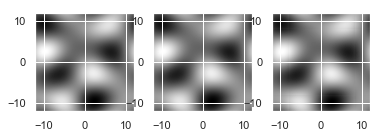

In [13]:
interact(f,rho=[0.1,0.2,0.4,0.8,1.6,3.2],
      deltaRelative=[0.01, 0.25, 0.5, 0.75, 1],
      fwhm=[0.01, 0.5, 1, 1.5, 2,2.5, 3, 3.5],
      w=[0.25,0.5,1,1.5,2,3]);

In [14]:
parameters = columnsfmri.setParameters('irregular')
for parameter,value in parameters.items():
    print(parameter + ": " + str(value))

randomNumberSeed: 23
nTrials: 32
N: 512
L: 24
wRange: [4.         3.         2.4        2.         1.71428571 1.5
 1.33333333 1.2        1.09090909 1.         0.92307692 0.85714286
 0.8        0.75       0.70588235 0.66666667 0.63157895 0.6
 0.57142857 0.54545455 0.52173913 0.5        0.48       0.46153846
 0.44444444 0.42857143 0.4        0.375      0.35294118 0.32432432
 0.3        0.27272727 0.22641509 0.2        0.17391304 0.15
 0.125      0.1        0.075      0.05      ]
rho: 0.625
deltaRelative: 1
fwhm: 1.02
beta: 0.035
sliceThickness: 2.5
AFlat: 87
TR: 2
nT: 1000
noiseType: 7T


In [ ]:
cr,noiseOfW = columnsfmri.simulatefMRIOfColumnPatterns(parameters)

In [33]:
wRange = parameters['wRange']
cnr = cr/noiseOfW
cnrMean = np.mean(cnr,axis=0)
cnrStd = np.std(cnr,axis=0)
cnrErrorPlus = cnrMean+2*cnrStd
cnrErrorMinus = cnrMean-2*cnrStd

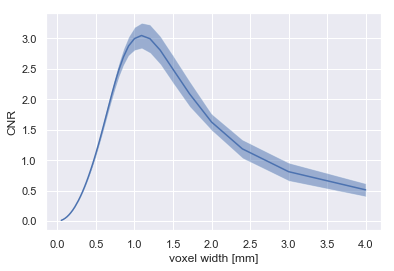

In [37]:
plt.plot(wRange, cnrMean)
plt.fill_between(wRange, cnrErrorMinus, cnrErrorPlus,alpha=0.5)
plt.xlabel('voxel width [mm]')
plt.ylabel('CNR')
plt.show()